
# ✅ Solutions - Révision finale en sciences de la nature

Ce carnet contient les **solutions complètes** aux 5 exercices de révision.


## 🔬 Solution Exercice 1 : Neutralisation acide-base

In [ ]:

import matplotlib.pyplot as plt

#def ph(volume_base):
#    return 3 + 4 * (1 - 2.718**(-0.8 * volume_base))

volumes = []
ph_values = []

v = 0
while True:
    p = 3 + 4 * (1 - 2.718**(-0.8 * v)) #p = ph(v)
    volumes.append(v)
    ph_values.append(p)
    print(f"Volume = {v:.1f} mL --> pH = {p:.2f}")
    if 6.8 <= p <= 7.2:
        break
    v += 0.5

plt.plot(volumes, ph_values, marker='o')
plt.xlabel("Volume de base (mL)")
plt.ylabel("pH")
plt.title("Titrage acide-base")
plt.grid(True)
plt.show()


## ⚛️ Solution Exercice 2 : Désintégration radioactive

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# Données connues
q0 = 100
demivie = 20
temps = np.arange(0, 65, 5)
quantites = []

for t in temps:
    q = q0 * 0.5 ** (t / demivie)
    quantites.append(q)

print("Quantités restantes :", quantites)

# Graphique
plt.plot(temps, quantites, marker='o')
plt.xlabel("Temps (s)")
plt.ylabel("Quantité restante")
plt.title("Désintégration radioactive")
plt.grid(True)
plt.show()


In [ ]:
# Variante 2
# Ajout du bruit à la courbe
np.random.seed(1)  # Pour reproductibilité
bruit = np.random.uniform(-0.05, 0.05, len(quantites))
quantites_bruitees = [q * (1 + b) for q, b in zip(quantites, bruit)]

plt.plot(temps, quantites, label="Théorique", marker='o')
plt.plot(temps, quantites_bruitees, label="Avec bruit (±5%)", marker='x')
plt.xlabel("Temps (s)")
plt.ylabel("Quantité restante")
plt.title("Désintégration radioactive (comparaison)")
plt.legend()
plt.grid(True)
plt.show()


## 💧 Solution Exercice 3 : Titrage par conductimétrie

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("conductivite.csv")
print(df)

plt.plot(df["volume"], df["conductivite"], marker='o')
plt.xlabel("Volume (mL)")
plt.ylabel("Conductivité (µS)")
plt.title("Titrage par conductimétrie")
plt.grid(True)
plt.show()

avant = df[df["volume"] <= 10]
apres = df[df["volume"] >= 11]

pente_avant = (avant["conductivite"].iloc[-1] - avant["conductivite"].iloc[0]) / (avant["volume"].iloc[-1] - avant["volume"].iloc[0])
pente_apres = (apres["conductivite"].iloc[-1] - apres["conductivite"].iloc[0]) / (apres["volume"].iloc[-1] - apres["volume"].iloc[0])

print(f"Pente avant équivalence : {pente_avant:.2f} µS/mL")
print(f"Pente après équivalence : {pente_apres:.2f} µS/mL")
print("Le point d'équivalence est estimé autour de 10-11 mL.")


In [ ]:
# Variante 3
# Trouver les deux points entourant le changement de pente
i = df["conductivite"].diff().abs().argmin()
x1, y1 = df.iloc[i]["volume"], df.iloc[i]["conductivite"]
x2, y2 = df.iloc[i+1]["volume"], df.iloc[i+1]["conductivite"]

# Interpolation linéaire : x_equiv ≈ x1 + ((7 - y1) / (y2 - y1)) * (x2 - x1)
x_eq = x1 + ((y1 - y2) / abs(y1 - y2)) * (x2 - x1) / 2
print(f"Volume équivalent estimé par interpolation : {x_eq:.2f} mL")


## 🧪 Solution Exercice 4 : Loi de Beer-Lambert

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

concentrations = np.array([0.00, 0.05, 0.10, 0.15, 0.20, 0.25])
absorbances = np.array([0.00, 0.12, 0.24, 0.36, 0.49, 0.61])

plt.errorbar(concentrations, absorbances, yerr=0.02, fmt='o')
plt.xlabel("Concentration (mol/L)")
plt.ylabel("Absorbance")
plt.title("Loi de Beer-Lambert")
plt.grid(True)
plt.show()

coef = np.polyfit(concentrations, absorbances, 1)
pente, intercept = coef
print(f"y = {pente:.2f}x + {intercept:.2f}")

abs_inconnue = 0.55
conc_inconnue = (abs_inconnue - intercept) / pente
print(f"Concentration estimée : {conc_inconnue:.3f} mol/L")


In [ ]:
# Variante 4
import numpy as np
import matplotlib.pyplot as plt

concentrations = np.array([0.00, 0.05, 0.10, 0.15, 0.20, 0.25])
absorbances = np.array([0.00, 0.12, 0.24, 0.36, 0.49, 0.61])

# plt.errorbar(concentrations, absorbances, yerr=0.02, fmt='o')
erreurs = np.array([0.01, 0.02, 0.015, 0.01, 0.02, 0.015])
plt.errorbar(concentrations, absorbances, yerr=erreurs, fmt='o', capsize=5)
plt.xlabel("Concentration (mol/L)")
plt.ylabel("Absorbance")
plt.title("Loi de Beer-Lambert")
plt.grid(True)
plt.show()

coef = np.polyfit(concentrations, absorbances, 1)
pente, intercept = coef
print(f"y = {pente:.2f}x + {intercept:.2f}")

abs_inconnue = 0.55
conc_inconnue = (abs_inconnue - intercept) / pente
print(f"Concentration estimée : {conc_inconnue:.3f} mol/L")



## ⚙️ Solution Exercice 5 : Rampe inclinée avec friction

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

angle = 30
masse = 2.0
mu = 0.2
g = 9.81

theta = np.radians(angle)
f_pente = masse * g * np.sin(theta)
f_friction = mu * masse * g * np.cos(theta)
f_nette = f_pente - f_friction
a = f_nette / masse

print(f"Accélération nette : {a:.2f} m/s²")

positions = [0]
vitesses = [0]
temps = [0]

dt = 0.1
for i in range(1, 101):
    t = i * dt
    v = vitesses[-1] + a * dt
    x = positions[-1] + v * dt
    vitesses.append(v)
    positions.append(x)
    temps.append(t)

plt.plot(temps, positions)
plt.xlabel("Temps (s)")
plt.ylabel("Position (m)")
plt.title("Mouvement sur une rampe inclinée")
plt.grid(True)
plt.show()


In [ ]:
# Variante 5
# Accélération avec friction
a_friction = a

# Accélération sans friction
a_sans = g * np.sin(theta)

# Trajectoire sans friction
positions_sans = [0]
v_sans = [0]
for i in range(1, 101):
    v = v_sans[-1] + a_sans * dt
    x = positions_sans[-1] + v * dt
    v_sans.append(v)
    positions_sans.append(x)

# Trajectoire avec friction déjà calculée précédemment : positions

# Tracer les deux trajectoires
plt.plot(temps, positions, label="Avec friction")
plt.plot(temps, positions_sans, label="Sans friction", linestyle='--')
plt.xlabel("Temps (s)")
plt.ylabel("Position (m)")
plt.title("Rampe inclinée : friction vs sans friction")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt

x = [0, 1, 2, 3, 4]
y = [0, 1, 4, 9, 16]

plt.plot(x, y)
plt.show()


In [ ]:
noms = ["A", "B", "C"]
valeurs = [4, 7, 5]

plt.bar(noms, valeurs)
plt.title("Résultats")
plt.xticks(rotation=0)
plt.legend(["Score"])
plt.show()

In [ ]:
x = [1, 2, 3]
y = [10, 12, 9]
erreurs = [0.5, 0.3, 0.6]

plt.errorbar(x, y, yerr=erreurs, fmt="o", label="Mesures")
plt.title("Mesures avec incertitude")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np

x = np.array([1, 2, 3, 4])
y = np.array([2.1, 4.2, 6.1, 8.0])

# Droite de régression : y = a·x + b

a, b = np.polyfit(x, y, 1)
y_reg = a * x + b

plt.plot(x, y, "o", label="Données")
plt.plot(x, y_reg, "-", label=f"y = {a:.2f}x + {b:.2f}")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np

x = np.array([1, 2, 3, 4])
y = np.array([2.1, 4.2, 6.1, 8.0])

# Droite de régression : y = a·x + b

a, b = np.polyfit(x, y, 1)
y_reg = a * x + b

plt.plot(x, y, "o", label="Données")
plt.plot(x, y_reg, "-", label=f"y = {a:.2f}x + {b:.2f}")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Atelier 9 final
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Chargement des données
df = pd.read_csv("photosynthese.csv")

# Étape 1 : Calcul des moyennes et écarts types
groupes = df.groupby(["Espèce", "Température"])["Taux"]
stats = groupes.agg(["mean", "std"]).reset_index()

# Étape 2 : Création du graphique avec barres d'erreur
especes = stats["Espèce"].unique()
plt.figure(figsize=(10, 6))

for espece in especes:
    sous_df = stats[stats["Espèce"] == espece]
    x = sous_df["Température"]
    y = sous_df["mean"]
    yerr = sous_df["std"]
    plt.errorbar(x, y, yerr=yerr, label=espece, capsize=5, marker='o', linestyle='--')

plt.title("Taux de photosynthèse en fonction de la température")
plt.xlabel("Température (°C)")
plt.ylabel("Taux de photosynthèse (µmol CO₂/m²/s)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("graphique_photosynthese.png")
plt.show()

# Étape 3 : Calcul de la pente entre 15 °C et 25 °C pour chaque espèce
pentes = {}
for espece in especes:
    sous_df = df[(df["Espèce"] == espece) & (df["Température"].isin([15, 25]))]
    moyennes = sous_df.groupby("Température")["Taux"].mean()

    if len(moyennes) == 2:
        t1, t2 = moyennes.index
        p1, p2 = moyennes.values
        pente = (p2 - p1) / (t2 - t1)
        pentes[espece] = pente
    else:
        print(f"Données insuffisantes pour l'espèce '{espece}' pour calculer la pente.")

# Étape 4 : Identifier l’espèce avec la plus grande pente
if pentes:
    espece_max = max(pentes, key=pentes.get)
    pente_max = pentes[espece_max]

    # Étape 5 : Conclusion
    print(f"\nEspèce avec la plus forte augmentation du taux de photosynthèse entre 15°C et 25°C : {espece_max}")
    print(f"Pente moyenne observée : {pente_max:.2f} µmol CO₂/m²/s/°C")
else:
    print("Aucune espèce avec données suffisantes pour comparer 15°C à 25°C.")


Température    0
Taux           0
Espèce         0
Capteur        0
Date           0
dtype: int64
Résumé par espèce :
Cladophora -> {'nb': 26, 'moyenne': np.float64(4.2), 'ecart_type': np.float64(0.9856665062476565)}
Spirogyra -> {'nb': 24, 'moyenne': np.float64(4.333333333333333), 'ecart_type': np.float64(0.9218037872683221)}


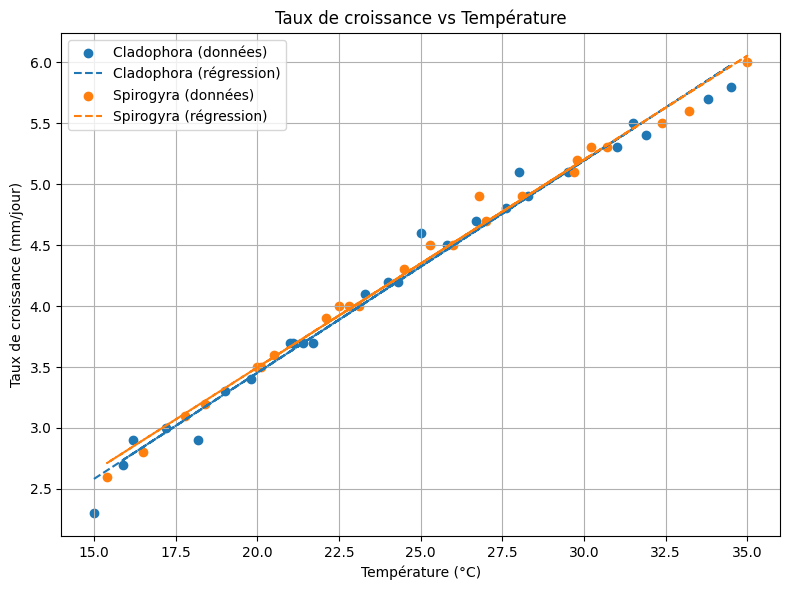

Mesures associées :
2025-07-01 | Cladophora | 15.0 °C | 2.3 mm/jour
2025-07-02 | Spirogyra | 20.0 °C | 3.5 mm/jour
2025-07-04 | Spirogyra | 22.5 °C | 4.0 mm/jour
2025-07-05 | Spirogyra | 26.8 °C | 4.9 mm/jour
2025-07-07 | Spirogyra | 30.2 °C | 5.3 mm/jour
2025-07-08 | Cladophora | 27.6 °C | 4.8 mm/jour
2025-07-10 | Spirogyra | 23.1 °C | 4.0 mm/jour
2025-07-11 | Cladophora | 19.8 °C | 3.4 mm/jour
2025-07-13 | Spirogyra | 16.5 °C | 2.8 mm/jour
2025-07-14 | Cladophora | 16.2 °C | 2.9 mm/jour
2025-07-16 | Spirogyra | 20.1 °C | 3.5 mm/jour
2025-07-17 | Cladophora | 24.0 °C | 4.2 mm/jour
2025-07-19 | Spirogyra | 28.1 °C | 4.9 mm/jour
2025-07-20 | Cladophora | 31.9 °C | 5.4 mm/jour
2025-07-22 | Spirogyra | 35.0 °C | 6.0 mm/jour
2025-07-23 | Cladophora | 31.0 °C | 5.3 mm/jour
2025-07-25 | Spirogyra | 27.0 °C | 4.7 mm/jour
2025-07-26 | Cladophora | 23.3 °C | 4.1 mm/jour


In [7]:
#-----------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Étape 1 - Lecture
df = pd.read_csv("croissance_algues.csv")

# Vérifier les NaN
print(df.isna().sum())
df = df.dropna()

# Conversion NumPy
temperatures = df["Température"].to_numpy()
taux = df["Taux"].to_numpy()

# Étape 2 - Analyse par espèce
donnees_par_espece = {}

for _, ligne in df.iterrows():
    espece = ligne["Espèce"]
    taux_val = ligne["Taux"]
    if espece not in donnees_par_espece:
        donnees_par_espece[espece] = []
    donnees_par_espece[espece].append(taux_val)

resume = {}
for espece, valeurs in donnees_par_espece.items():
    valeurs_np = np.array(valeurs)
    resume[espece] = {
        "nb": len(valeurs),
        "moyenne": np.mean(valeurs_np),
        "ecart_type": np.std(valeurs_np)
    }

print("Résumé par espèce :")
for espece, stats in resume.items():
    print(f"{espece} -> {stats}")

# Étape 3 - Graphique
plt.figure(figsize=(8,6))

especes = df["Espèce"].unique()
for espece in especes:
    sous_df = df[df["Espèce"] == espece]
    x = sous_df["Température"].to_numpy()
    y = sous_df["Taux"].to_numpy()
    plt.scatter(x, y, label=f"{espece} (données)")

    # Régression linéaire
    coeffs = np.polyfit(x, y, deg=1)
    y_pred = np.polyval(coeffs, x)
    plt.plot(x, y_pred, linestyle="--", label=f"{espece} (régression)")

plt.title("Taux de croissance vs Température")
plt.xlabel("Température (°C)")
plt.ylabel("Taux de croissance (mm/jour)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("croissance_regression.png")
plt.show()

# Étape 4 - Recherche capteur
nom_capteur = input("Entrez le nom du capteur : ")
filtre = df[df["Capteur"] == nom_capteur]

if filtre.empty:
    print("Aucune donnée pour ce capteur.")
else:
    print("Mesures associées :")
    for _, ligne in filtre.iterrows():
        print(f"{ligne['Date']} | {ligne['Espèce']} | {ligne['Température']} °C | {ligne['Taux']} mm/jour")
